In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
image = cv2.imread('C:/Users/nsida/Downloads/Computer-Vision-with-Python/DATA/Brain_MRI.jpeg')

In [3]:
img_copy = np.copy(image)

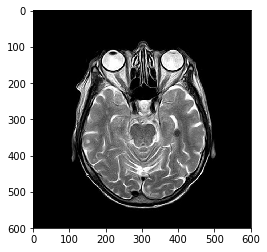

In [5]:
#Convert the Image to GrayScale
gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

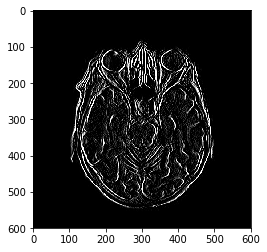

In [15]:
# Creating a Custom kERNEL
#3x3 array for edge detection
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
filteredx = cv2.filter2D(gray, -1, sobel_x)
plt.imshow(filteredx, cmap='gray')

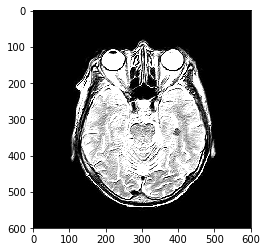

In [13]:
sobel_y = np.array([[-1, -2, 1],
                   [0, 0, 0],
                   [1, 2, 1]])
filteredy = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(filteredy, cmap='gray')

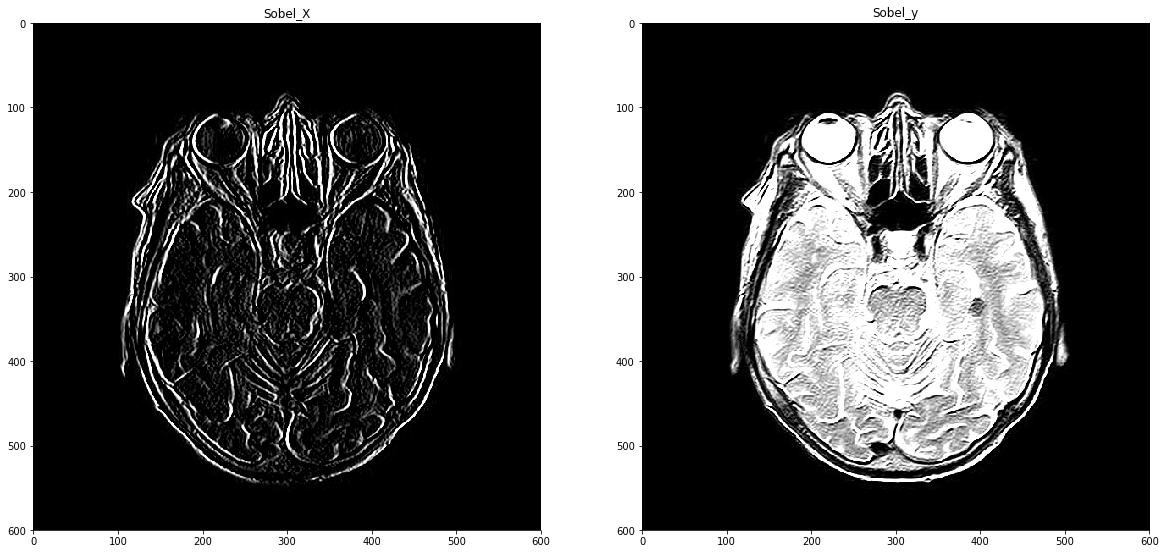

In [16]:
#Now we're going to apply the Gaussian Blur Filter
# gray_blue = cv2.GaussianBlur(filteredy, (5,5), 0)
# Now we will add these plots side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Sobel_X')
ax1.imshow(filteredx, cmap='gray')

ax2.set_title('Sobel_y')
ax2.imshow(filteredy, cmap='gray')

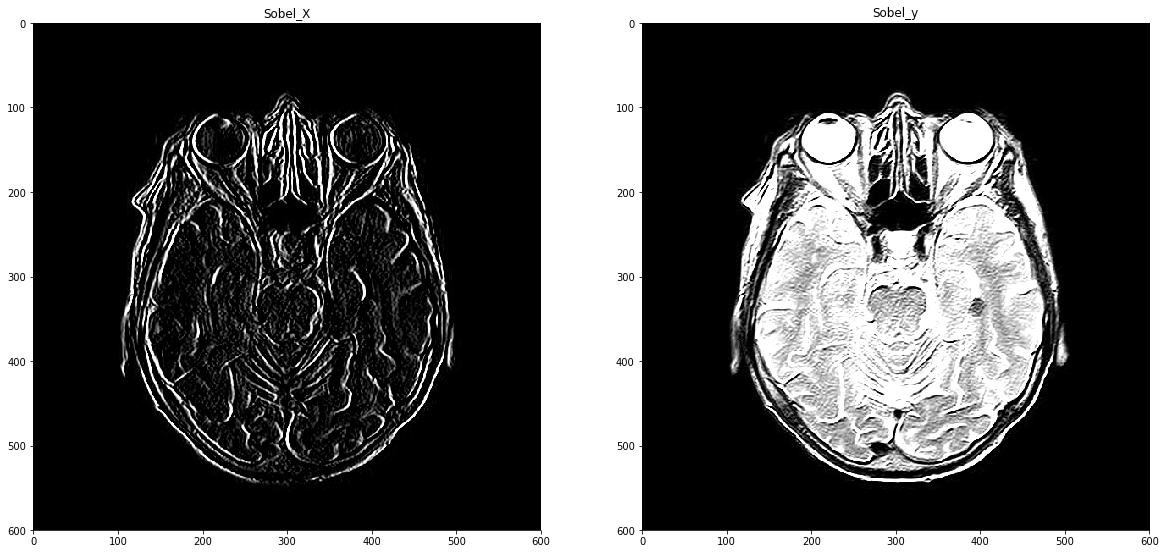

In [19]:
#Now we're going to apply the Gaussian Blur Filter
gray_blue = cv2.GaussianBlur(filteredy, (25,25), 0)
# Now we will add these plots side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Sobel_X')
ax1.imshow(filteredx, cmap='gray')

ax2.set_title('Sobel_y')
ax2.imshow(filteredy, cmap='gray')

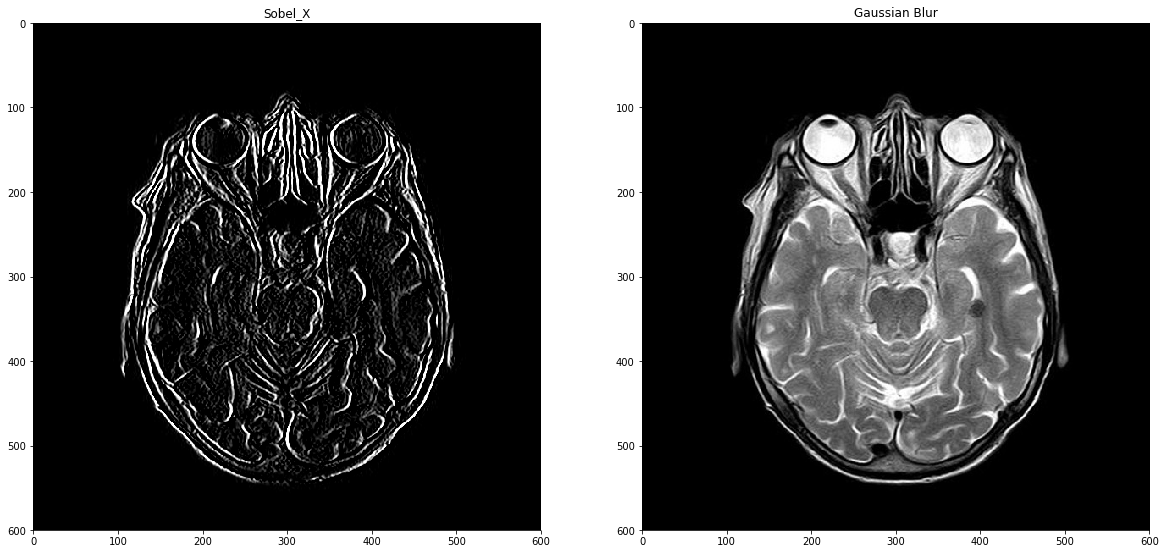

In [24]:
#Now we're going to apply the Gaussian Blur Filter with the Gray scale image instead of Sobel Y
gray_blue = cv2.GaussianBlur(gray, (225,25), 0)
# Now we will add these plots side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Sobel_X')
ax1.imshow(filteredx, cmap='gray')

ax2.set_title('Gaussian Blur')
ax2.imshow(gray, cmap='gray')

# Now we're going to apply the Gaussian Blur Filter with Sobel_X scale image instead of Sobel Y

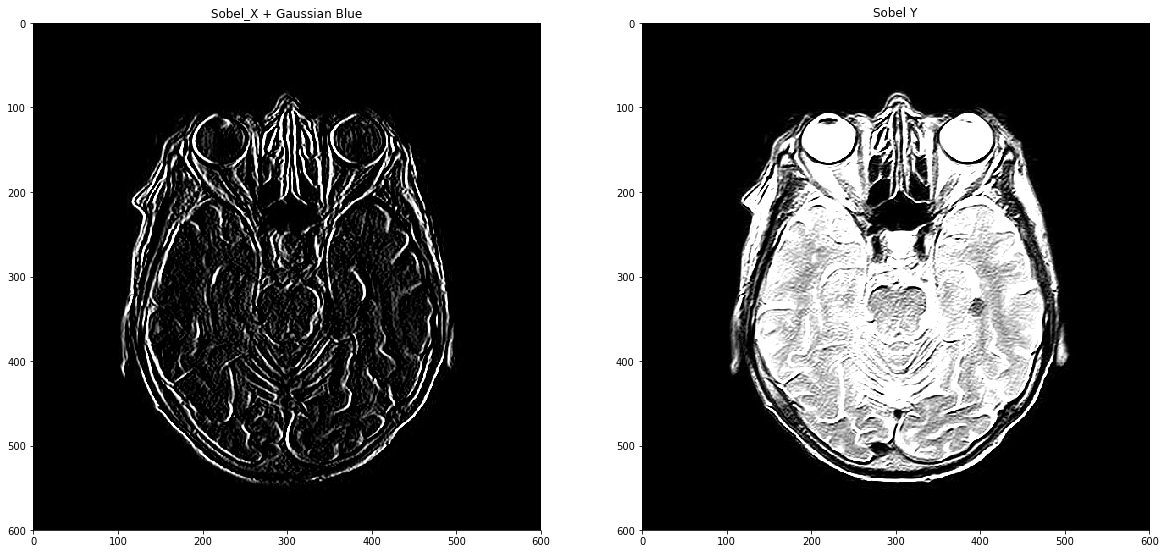

In [27]:
#Now we're going to apply the Gaussian Blur Filter with the Gray scale image instead of Sobel Y
gray_blue = cv2.GaussianBlur(filteredx, (225,25), 0)
# Now we will add these plots side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Sobel_X + Gaussian Blue')
ax1.imshow(filteredx, cmap='gray')

ax2.set_title('Sobel Y')
ax2.imshow(filteredy, cmap='gray')

# Point Detection

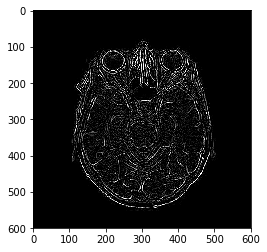

In [32]:
# Trying to detect points
point = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
dpoint = cv2.filter2D(gray, -1, point)
plt.imshow(dpoint, cmap='gray')

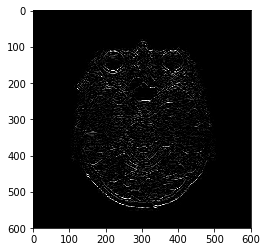

In [31]:
# Trying to detect Lines
line = np.array([[-1, -1, -1],
                   [2, 2, 2],
                   [-1, -1, -1]])
dline = cv2.filter2D(gray, -1, line)
plt.imshow(dline, cmap='gray')

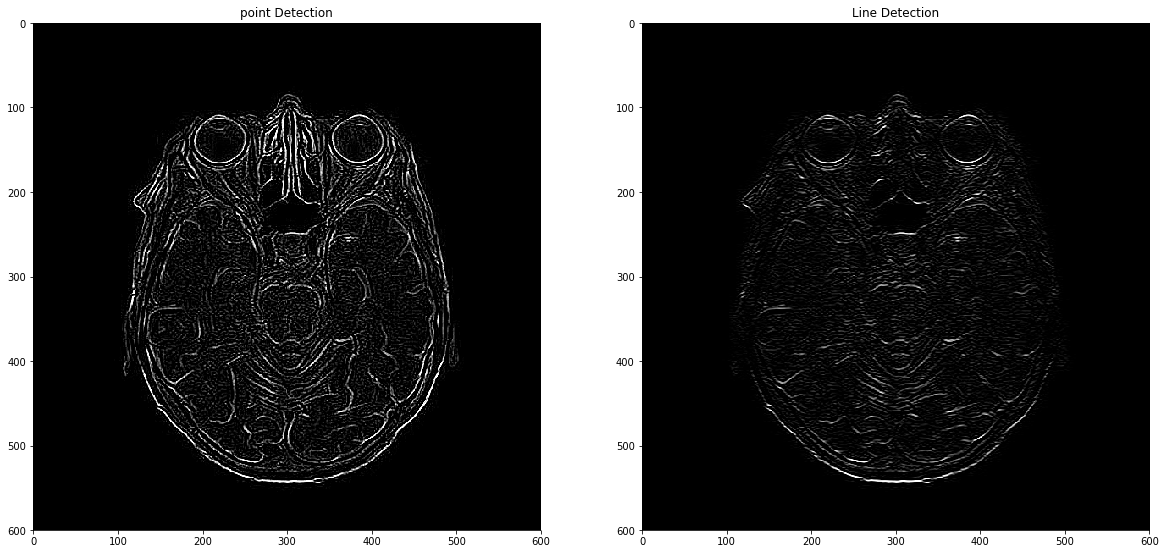

In [33]:


f, (ax5, ax6) = plt.subplots(1, 2, figsize=(20,10))
ax5.set_title('point Detection')
ax5.imshow(dpoint, cmap='gray')

ax6.set_title('Line Detection')
ax6.imshow(dline, cmap='gray')


In [37]:
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx8u = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=5)
sobelx64f = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

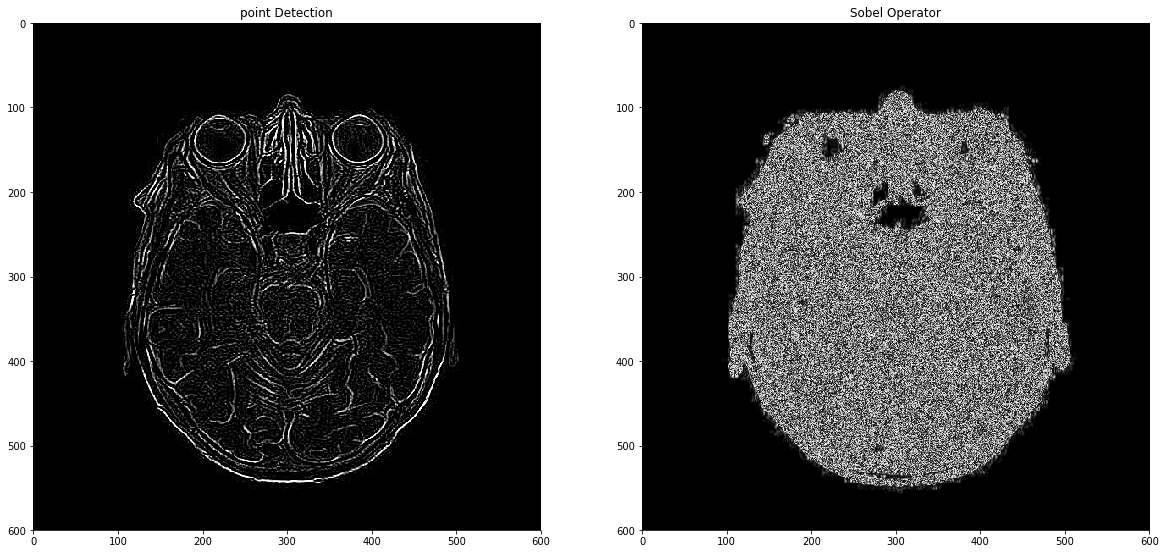

In [39]:
f, (ax7, ax8) = plt.subplots(1, 2, figsize=(20,10))
ax7.set_title('point Detection')
ax7.imshow(dpoint, cmap='gray')

ax8.set_title('Sobel Operator')
ax8.imshow(sobel_8u, cmap='gray')

# Harris Corner Detection

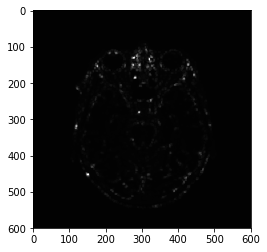

In [44]:
# We need to detect the points of variation,
# So, We use Floating point values that Haris Corner Detector will use
gray = np.float32(gray)

# Gray scale Floating point, and size of the neighbourhood to look at when Identifying these corners
# 8 means 2x2 pixel square
# Then we input the size of our sobel operator 3 which is also the kernel state
data = cv2.cornerHarris(gray, 5, 5, 0.002)
data = cv2.dilate(data, None)
plt.imshow(data, cmap='gray')

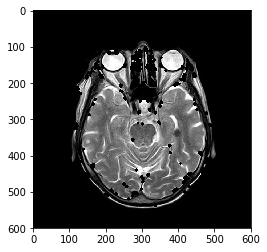

In [73]:
# Select and Display the Strongest Corners
# This may vary from image to image
thresh = 0.08*data.max()

# Create an image copy to draw corners on 
corner_image = np.copy(gray)
    
# Iterate throught all the corners and draw them on the image 
#(if they pass the threshold)
for j in range (0, data.shape[0]):
    for i in range(0, data.shape[1]):
        if(data[j,i] > thresh):
            # image, center pt., radius, color, thickness
            cv2.circle(corner_image, (i,j), 2, (0,255,0), 1)
plt.imshow(corner_image,cmap='gray')

# Brain Contours

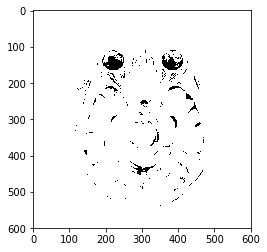

In [85]:
# Creating a Binary Threshold Image
retval, binary = cv2.threshold(gray,225,225,cv2.THRESH_BINARY_INV)#Inverse Threshold

gray_blue = cv2.GaussianBlur(binary, (11,11), 0)
plt.imshow(binary, cmap = 'gray')

In [ ]:
# Corner VS Contours

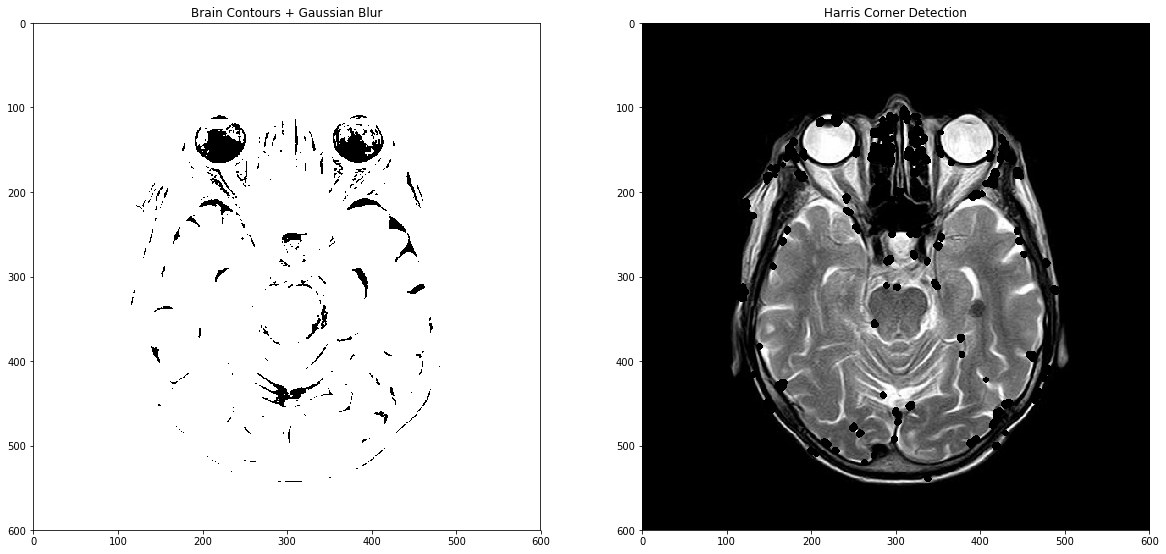

In [87]:
f, (ax9, ax10) = plt.subplots(1, 2, figsize=(20,10))
ax9.set_title('Brain Contours + Gaussian Blur')
ax9.imshow(binary, cmap='gray')

ax10.set_title('Harris Corner Detection')
ax10.imshow(corner_image, cmap='gray')